### 마켓 데이터 크롤링
# KRX 개별종목 일자별 시세

<img src="http://i.imgur.com/grQHNKG.jpg">
    
#### 2017 FinanceData http://fb.com/financedata

# 종목 코드
* [KRX] 시가총액 상하위 <br/>코스피 전체 종목 (시총 상위 종목의 rank변화를 통해 산업 트렌드를 살펴보자)
* http://marketdata.krx.co.kr/contents/MKD/04/0406/04060100/MKD04060100.jsp
* 시장정보 → 주식 → 순위정보 → 시가총액 상/하위


시가총액 비교
* [구글 스프레트] https://goo.gl/3LZoIh 코스피 전체 종목(2005-06-30)
* [구글 스프레트] https://goo.gl/bgRpSf 코스피 전체 종목(2015-06-30)

# 개별 종목 시세
* 시장정보 → 주식 → 종목정보 → 일자별 시세
* http://marketdata.krx.co.kr/contents/MKD/04/0402/04020100/MKD04020100T3T2.jsp

<img width="80%" src="http://i.imgur.com/2laEGHp.png">

# 개별종목 시세
개별 종목의 특정 기간의 시세를 XLS(혹은 CSV)로 다운로드
* isu_cd: ISIN 코드, 예) KR7005930003 (삼성전자) 
* fromdate: 시작일
* todate: 종료일

In [1]:
# 삼성전자 2016-01-01, XLS

import pandas as pd
import requests

# STEP 01: Generate OTP
gen_otp_url = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx"
gen_otp_data = {
    'name':'fileDown',
    'filetype':'xls',
    'url':'MKD/04/0402/04020100/mkd04020100t3_02',
    'isu_cd':'KR7005930003',
    'fromdate':'20160101',
    'todate':'20161231',
}

r = requests.post(gen_otp_url, gen_otp_data)
code = r.text

# STEP 02: download
down_url = 'http://file.krx.co.kr/download.jspx'
down_data = {
    'code': code,
}

headers = {'Referer': 'http://marketdata.krx.co.kr'}
r = requests.post(down_url, down_data, headers=headers)
with open("A005930.xls", 'wb') as f:
    f.write(r.content)

df = pd.read_excel('A005930.xls')
df.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2016/12/29,"1,802,000","14,000","150,329","269,850,552,000","1,771,000","1,802,000","1,770,000","253,504,165","140,679,337"
1,2016/12/28,"1,788,000","-11,000","133,258","238,389,027,152","1,792,000","1,799,000","1,780,000","251,534,655","140,679,337"
2,2016/12/27,"1,799,000","1,000","93,069","167,499,160,785","1,799,000","1,810,000","1,793,000","253,082,127","140,679,337"
3,2016/12/26,"1,798,000","16,000","96,472","173,030,035,000","1,780,000","1,800,000","1,778,000","252,941,448","140,679,337"
4,2016/12/23,"1,782,000","-27,000","166,697","298,604,129,418","1,801,000","1,804,000","1,780,000","250,690,579","140,679,337"


In [2]:
print ( 'item counts: %d' % len(df) )

item counts: 246


In [3]:
df = pd.read_excel('A005930.xls', thousands=',', parse_dates=['년/월/일'])
df.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2016-12-29,1802000,14000,150329,269850552000,1771000,1802000,1770000,253504165,140679337
1,2016-12-28,1788000,-11000,133258,238389027152,1792000,1799000,1780000,251534655,140679337
2,2016-12-27,1799000,1000,93069,167499160785,1799000,1810000,1793000,253082127,140679337
3,2016-12-26,1798000,16000,96472,173030035000,1780000,1800000,1778000,252941448,140679337
4,2016-12-23,1782000,-27000,166697,298604129418,1801000,1804000,1780000,250690579,140679337


In [4]:
df = df[['년/월/일',  '종가', '거래량(주)', '시가', '고가', '저가']]
df.head()

,년/월/일,종가,거래량(주),시가,고가,저가
0,2016-12-29,1802000,150329,1771000,1802000,1770000
1,2016-12-28,1788000,133258,1792000,1799000,1780000
2,2016-12-27,1799000,93069,1799000,1810000,1793000
3,2016-12-26,1798000,96472,1780000,1800000,1778000
4,2016-12-23,1782000,166697,1801000,1804000,1780000


In [5]:
df.columns = ['date', 'close', 'volume', 'open', 'hign', 'low']
df.set_index('date', inplace=True)
df.head()

,close,volume,open,hign,low
date,,,,,
2016-12-29,1802000,150329,1771000,1802000,1770000
2016-12-28,1788000,133258,1792000,1799000,1780000
2016-12-27,1799000,93069,1799000,1810000,1793000
2016-12-26,1798000,96472,1780000,1800000,1778000
2016-12-23,1782000,166697,1801000,1804000,1780000


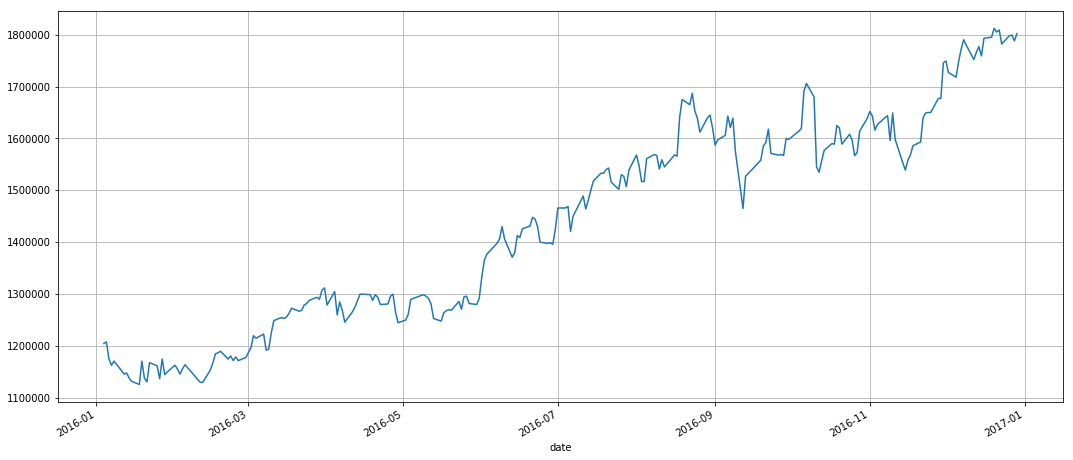

In [6]:
%matplotlib inline
df['close'].plot(figsize=(18,8), grid=True)

----
#### 2017 FinanceData http://fb.com/financedata http://financedata.github.com

